In [1917]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import warnings
import plotly.graph_objs as go
import plotly.offline as py
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

from sklearn.feature_selection import RFECV
from sklearn import tree
warnings.filterwarnings("ignore", 'This pattern has match groups')

In [1084]:
x=pd.read_csv('supply_chain.csv',encoding='latin1')

In [1085]:
x.head()

,ID,Project Code,PQ #,PO / SO #,ASN/DN #,Country,Managed By,Fulfill Via,Vendor INCO Term,Shipment Mode,...,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Manufacturing Site,First Line Designation,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD)
0,1,100-CI-T01,Pre-PQ Process,SCMS-4,ASN-8,Côte d'Ivoire,PMO - US,Direct Drop,EXW,Air,...,30,19,551.0,29.00,0.97,Ranbaxy Fine Chemicals LTD,Yes,13,780.34,NaN
1,3,108-VN-T01,Pre-PQ Process,SCMS-13,ASN-85,Vietnam,PMO - US,Direct Drop,EXW,Air,...,240,1000,6200.0,6.20,0.03,"Aurobindo Unit III, India",Yes,358,4521.5,NaN
2,4,100-CI-T01,Pre-PQ Process,SCMS-20,ASN-14,Côte d'Ivoire,PMO - US,Direct Drop,FCA,Air,...,100,500,40000.0,80.00,0.80,ABBVIE GmbH & Co.KG Wiesbaden,Yes,171,1653.78,NaN
3,15,108-VN-T01,Pre-PQ Process,SCMS-78,ASN-50,Vietnam,PMO - US,Direct Drop,EXW,Air,...,60,31920,127360.8,3.99,0.07,"Ranbaxy, Paonta Shahib, India",Yes,1855,16007.06,NaN
4,16,108-VN-T01,Pre-PQ Process,SCMS-81,ASN-55,Vietnam,PMO - US,Direct Drop,EXW,Air,...,60,38000,121600.0,3.20,0.05,"Aurobindo Unit III, India",Yes,7590,45450.08,NaN


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_66308\513174798.py:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<AxesSubplot: >

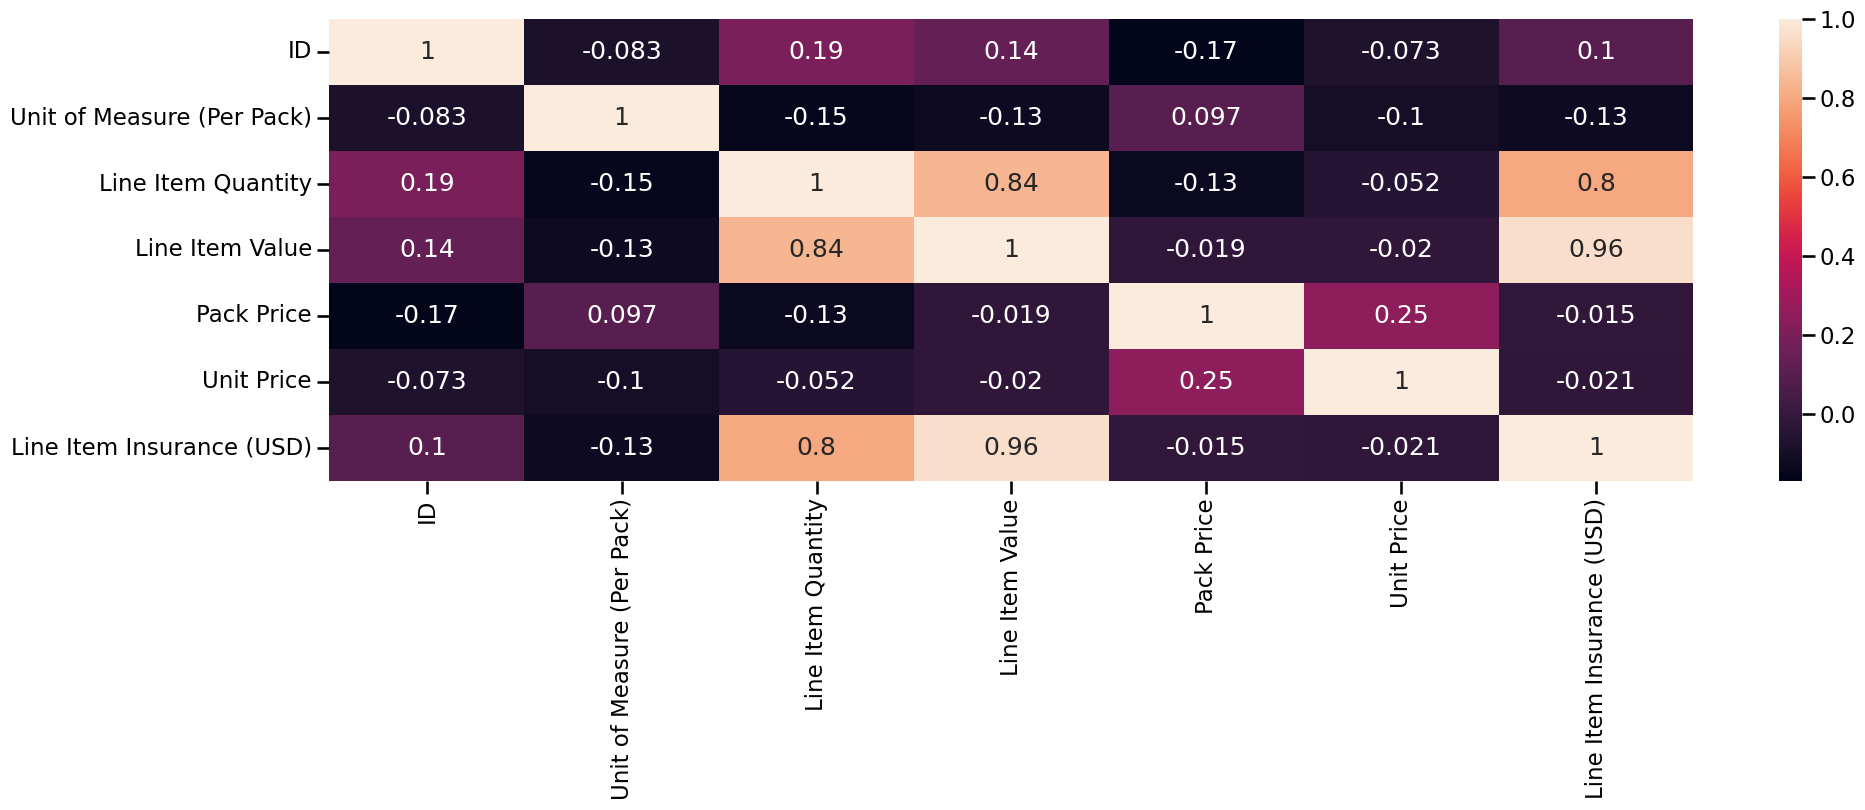

In [1086]:
plt.figure(figsize=(22,6))
sns.heatmap(x.corr(),annot=True)

In [1087]:
x.shape

(10324, 33)

In [1088]:
x.describe()

,ID,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Line Item Insurance (USD)
count,10324.000000,10324.000000,10324.000000,1.032400e+04,10324.000000,10324.000000,10037.000000
mean,51098.968229,77.990895,18332.534870,1.576506e+05,21.910241,0.611701,240.117626
std,31944.332496,76.579764,40035.302961,3.452921e+05,45.609223,3.275808,500.190568
min,1.000000,1.000000,1.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,12795.750000,30.000000,408.000000,4.314593e+03,4.120000,0.080000,6.510000
50%,57540.500000,60.000000,3000.000000,3.047147e+04,9.300000,0.160000,47.040000
75%,83648.250000,90.000000,17039.750000,1.664471e+05,23.592500,0.470000,252.400000
max,86823.000000,1000.000000,619999.000000,5.951990e+06,1345.640000,238.650000,7708.440000


In [1089]:
x.isnull().sum()

ID                                 0
Project Code                       0
PQ #                               0
PO / SO #                          0
ASN/DN #                           0
Country                            0
Managed By                         0
Fulfill Via                        0
Vendor INCO Term                   0
Shipment Mode                    360
PQ First Sent to Client Date       0
PO Sent to Vendor Date             0
Scheduled Delivery Date            0
Delivered to Client Date           0
Delivery Recorded Date             0
Product Group                      0
Sub Classification                 0
Vendor                             0
Item Description                   0
Molecule/Test Type                 0
Brand                              0
Dosage                          1736
Dosage Form                        0
Unit of Measure (Per Pack)         0
Line Item Quantity                 0
Line Item Value                    0
Pack Price                         0
U

In [1090]:
(x.isnull().sum()/x.shape[0])*100

ID                               0.000000
Project Code                     0.000000
PQ #                             0.000000
PO / SO #                        0.000000
ASN/DN #                         0.000000
Country                          0.000000
Managed By                       0.000000
Fulfill Via                      0.000000
Vendor INCO Term                 0.000000
Shipment Mode                    3.487021
PQ First Sent to Client Date     0.000000
PO Sent to Vendor Date           0.000000
Scheduled Delivery Date          0.000000
Delivered to Client Date         0.000000
Delivery Recorded Date           0.000000
Product Group                    0.000000
Sub Classification               0.000000
Vendor                           0.000000
Item Description                 0.000000
Molecule/Test Type               0.000000
Brand                            0.000000
Dosage                          16.815188
Dosage Form                      0.000000
Unit of Measure (Per Pack)       0

#### Irrelevant columns(Might not be needed)



In [1091]:
x=x.drop(columns=['PQ #','PO / SO #','ASN/DN #','Managed By','Fulfill Via','Vendor INCO Term','PQ First Sent to Client Date','Product Group','Vendor'])

In [1799]:
x=x.drop(columns=['ID'])

##### Line Item Insaurance

In [1092]:
#1
x['Line Item Insurance (USD)']=x['Line Item Insurance (USD)'].fillna(x['Line Item Insurance (USD)'].median())

In [1093]:
#2
x['Line Item Insurance (USD)'].values[x['Line Item Insurance (USD)'].values>1000]=x['Line Item Insurance (USD)'].median()

In [1094]:
#3
x['Line Item Insurance (USD)'].values[x['Line Item Insurance (USD)'].values>200]=x['Line Item Insurance (USD)'].mean()

In [1095]:
x['Line Item Insurance (USD)']
x.shape

(10324, 24)

<AxesSubplot: ylabel='Line Item Insurance (USD)'>

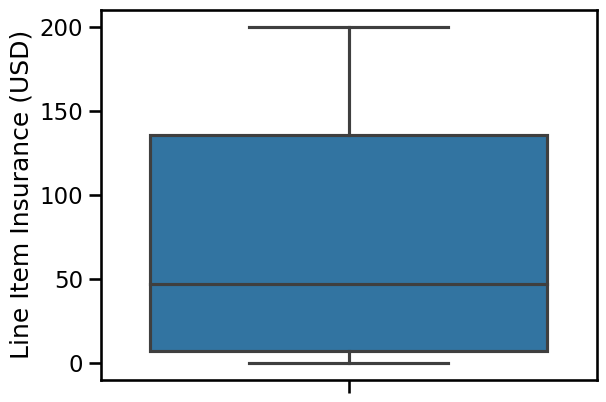

In [1096]:
sns.boxplot(y=x['Line Item Insurance (USD)'])

In [1097]:
x.head()

,ID,Project Code,Country,Shipment Mode,PO Sent to Vendor Date,Scheduled Delivery Date,Delivered to Client Date,Delivery Recorded Date,Sub Classification,Item Description,...,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Manufacturing Site,First Line Designation,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD)
0,1,100-CI-T01,Côte d'Ivoire,Air,Date Not Captured,2-Jun-06,2-Jun-06,2-Jun-06,HIV test,"HIV, Reveal G3 Rapid HIV-1 Antibody Test, 30 T...",...,30,19,551.0,29.00,0.97,Ranbaxy Fine Chemicals LTD,Yes,13,780.34,47.04
1,3,108-VN-T01,Vietnam,Air,Date Not Captured,14-Nov-06,14-Nov-06,14-Nov-06,Pediatric,"Nevirapine 10mg/ml, oral suspension, Bottle, 2...",...,240,1000,6200.0,6.20,0.03,"Aurobindo Unit III, India",Yes,358,4521.5,47.04
2,4,100-CI-T01,Côte d'Ivoire,Air,Date Not Captured,27-Aug-06,27-Aug-06,27-Aug-06,HIV test,"HIV 1/2, Determine Complete HIV Kit, 100 Tests",...,100,500,40000.0,80.00,0.80,ABBVIE GmbH & Co.KG Wiesbaden,Yes,171,1653.78,47.04
3,15,108-VN-T01,Vietnam,Air,Date Not Captured,1-Sep-06,1-Sep-06,1-Sep-06,Adult,"Lamivudine 150mg, tablets, 60 Tabs",...,60,31920,127360.8,3.99,0.07,"Ranbaxy, Paonta Shahib, India",Yes,1855,16007.06,47.04
4,16,108-VN-T01,Vietnam,Air,Date Not Captured,11-Aug-06,11-Aug-06,11-Aug-06,Adult,"Stavudine 30mg, capsules, 60 Caps",...,60,38000,121600.0,3.20,0.05,"Aurobindo Unit III, India",Yes,7590,45450.08,47.04


##### Fregit cost US Dollar

In [1098]:
x['Freight Cost (USD)'].values

array(['780.34', '4521.5', '1653.78', ...,
       'Freight Included in Commodity Cost',
       'Freight Included in Commodity Cost',
       'Freight Included in Commodity Cost'], dtype=object)

In [1099]:
x=x.loc[~x['Freight Cost (USD)'].str.contains('Freight Included in Commodity Cost')]

In [1100]:
x=x.loc[~x['Freight Cost (USD)'].str.contains('Invoiced Separately')]

In [1101]:
x=x.loc[~x['Freight Cost (USD)'].str.contains('See')]

In [1102]:
x['Freight Cost (USD)'].values

array(['780.34', '4521.5', '1653.78', ..., '3785.72', '26180', '3410'],
      dtype=object)

In [1103]:
x.shape

(6198, 24)

##### Shipment mode

In [1104]:
x

,ID,Project Code,Country,Shipment Mode,PO Sent to Vendor Date,Scheduled Delivery Date,Delivered to Client Date,Delivery Recorded Date,Sub Classification,Item Description,...,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Manufacturing Site,First Line Designation,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD)
0,1,100-CI-T01,Côte d'Ivoire,Air,Date Not Captured,2-Jun-06,2-Jun-06,2-Jun-06,HIV test,"HIV, Reveal G3 Rapid HIV-1 Antibody Test, 30 T...",...,30,19,551.00,29.00,0.97,Ranbaxy Fine Chemicals LTD,Yes,13,780.34,47.04
1,3,108-VN-T01,Vietnam,Air,Date Not Captured,14-Nov-06,14-Nov-06,14-Nov-06,Pediatric,"Nevirapine 10mg/ml, oral suspension, Bottle, 2...",...,240,1000,6200.00,6.20,0.03,"Aurobindo Unit III, India",Yes,358,4521.5,47.04
2,4,100-CI-T01,Côte d'Ivoire,Air,Date Not Captured,27-Aug-06,27-Aug-06,27-Aug-06,HIV test,"HIV 1/2, Determine Complete HIV Kit, 100 Tests",...,100,500,40000.00,80.00,0.80,ABBVIE GmbH & Co.KG Wiesbaden,Yes,171,1653.78,47.04
3,15,108-VN-T01,Vietnam,Air,Date Not Captured,1-Sep-06,1-Sep-06,1-Sep-06,Adult,"Lamivudine 150mg, tablets, 60 Tabs",...,60,31920,127360.80,3.99,0.07,"Ranbaxy, Paonta Shahib, India",Yes,1855,16007.06,47.04
4,16,108-VN-T01,Vietnam,Air,Date Not Captured,11-Aug-06,11-Aug-06,11-Aug-06,Adult,"Stavudine 30mg, capsules, 60 Caps",...,60,38000,121600.00,3.20,0.05,"Aurobindo Unit III, India",Yes,7590,45450.08,47.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10305,86802,111-MZ-T30,Mozambique,Truck,N/A - From RDC,29-May-15,9-Jun-15,15-Jun-15,Adult,Lamivudine/Nevirapine/Zidovudine 150/200/300mg...,...,60,300000,2316000.00,7.72,0.13,Hetero Unit III Hyderabad IN,Yes,39688,28277.42,47.04
10306,86803,111-MZ-T30,Mozambique,Truck,N/A - From RDC,29-May-15,15-Jun-15,15-Jun-15,Adult,Lamivudine/Tenofovir Disoproxil Fumarate 300/3...,...,30,16006,73467.54,4.59,0.15,"Hetero, Jadcherla, unit 5, IN",Yes,1504,1653.9,75.52
10310,86808,114-UG-T30,Uganda,Truck,N/A - From RDC,30-Jun-15,4-Jun-15,15-Jun-15,Pediatric,"Lamivudine/Nevirapine/Zidovudine 30/50/60mg, d...",...,60,18000,64800.00,3.60,0.06,Mylan (formerly Matrix) Nashik,Yes,2253,3785.72,76.27
10315,86814,151-NG-T30,Nigeria,Air Charter,N/A - From RDC,30-Jun-15,15-May-15,22-May-15,Adult,"Lopinavir/Ritonavir 200/50mg [Aluvia], tablets...",...,120,70000,1304800.00,18.64,0.16,ABBVIE Ludwigshafen Germany,Yes,15198,26180,47.04


In [1105]:
x.isnull().sum()

ID                               0
Project Code                     0
Country                          0
Shipment Mode                  211
PO Sent to Vendor Date           0
Scheduled Delivery Date          0
Delivered to Client Date         0
Delivery Recorded Date           0
Sub Classification               0
Item Description                 0
Molecule/Test Type               0
Brand                            0
Dosage                        1376
Dosage Form                      0
Unit of Measure (Per Pack)       0
Line Item Quantity               0
Line Item Value                  0
Pack Price                       0
Unit Price                       0
Manufacturing Site               0
First Line Designation           0
Weight (Kilograms)               0
Freight Cost (USD)               0
Line Item Insurance (USD)        0
dtype: int64

In [1106]:
x['Shipment Mode'].values

array(['Air', 'Air', 'Air', ..., 'Truck', 'Air Charter', 'Air Charter'],
      dtype=object)

In [1107]:
x['Shipment Mode']=x['Shipment Mode'].fillna(x['Shipment Mode'].mode()[0])

In [1108]:
x['Shipment Mode'].isnull().sum()

0

##### Dosage

In [1109]:
x.isnull().sum()

ID                               0
Project Code                     0
Country                          0
Shipment Mode                    0
PO Sent to Vendor Date           0
Scheduled Delivery Date          0
Delivered to Client Date         0
Delivery Recorded Date           0
Sub Classification               0
Item Description                 0
Molecule/Test Type               0
Brand                            0
Dosage                        1376
Dosage Form                      0
Unit of Measure (Per Pack)       0
Line Item Quantity               0
Line Item Value                  0
Pack Price                       0
Unit Price                       0
Manufacturing Site               0
First Line Designation           0
Weight (Kilograms)               0
Freight Cost (USD)               0
Line Item Insurance (USD)        0
dtype: int64

In [1110]:
x['Dosage'].values

array([nan, '10mg/ml', nan, ..., '30/50/60mg', '200/50mg', '150/300mg'],
      dtype=object)

In [1111]:
x['Dosage'].mode()

0    300mg
Name: Dosage, dtype: object

In [1112]:
x['Dosage']=x['Dosage'].fillna(x['Dosage'].mode()[0])

In [1113]:
x['Dosage'].isnull().sum()

0

##### Weight (Kilograms)

In [1114]:
x['Weight (Kilograms)'].unique()

array(['13', '358', '171', ..., '1504', '15198', '1547'], dtype=object)

In [1115]:
x=x.loc[~x['Weight (Kilograms)'].str.contains('Weight Captured Separately')]

In [1116]:
x=x.loc[~x['Weight (Kilograms)'].str.contains('See')]


In [1117]:
x.shape

(6175, 24)

##### PO Sent to Vendor Date


In [1118]:
x['PO Sent to Vendor Date'].values

array(['Date Not Captured', 'Date Not Captured', 'Date Not Captured', ...,
       'N/A - From RDC', 'N/A - From RDC', 'N/A - From RDC'], dtype=object)

In [1119]:
x['PO Sent to Vendor Date'].isnull().sum()

0

In [1120]:
x.shape

(6175, 24)

In [1121]:
x=x.loc[~x['PO Sent to Vendor Date'].str.contains('Date Not Captured')]

In [1122]:
x=x.loc[~x['PO Sent to Vendor Date'].str.contains('N/A - From RDC')]

##### Converting date string using datetime

In [1843]:
for column in ['Scheduled Delivery Date', 'Delivered to Client Date', 'Delivery Recorded Date']:
        x[column] = pd.to_datetime(x[column])
        x[column + ' Year'] = x[column].apply(lambda x: x.year)
        x[column + ' Month'] = x[column].apply(lambda x: x.month)
        x[column + ' Day'] = x[column].apply(lambda x: x.day)
        x = x.drop(column, axis=1)

In [1844]:
x

,Project Code,Country,Shipment Mode,PO Sent to Vendor Date,Sub Classification,Item Description,Molecule/Test Type,Brand,Dosage,Dosage Form,...,Line Item Insurance (USD),Scheduled Delivery Date Year,Scheduled Delivery Date Month,Scheduled Delivery Date Day,Delivered to Client Date Year,Delivered to Client Date Month,Delivered to Client Date Day,Delivery Recorded Date Year,Delivery Recorded Date Month,Delivery Recorded Date Day
13,107-RW-T01,Rwanda,0,12/22/2006,1,"Lamivudine/Zidovudine 150/300mg, tablets, 60 Tabs",Lamivudine/Zidovudine,Generic,150/300mg,Tablet - FDC,...,47.040000,2007,2,27,2007,2,27,2007,2,27
18,109-TZ-T01,Tanzania,0,4/12/2007,5,"Didanosine 2g [Videx], powder for oral solutio...",Didanosine,Videx,2g,Powder for oral solution,...,47.040000,2007,6,6,2007,6,6,2007,6,6
19,102-NG-T01,Nigeria,0,5/13/2007,2,"HIV 1/2, Determine Complete HIV Kit, 100 Tests","HIV 1/2, Determine Complete HIV Kit",Determine,300mg,Test kit,...,128.000000,2007,6,19,2007,6,19,2007,6,19
20,102-NG-T01,Nigeria,0,5/17/2007,2,"HIV 1/2, Stat-Pak HIV, Kit, 20 Tests","HIV 1/2, Stat-Pak HIV, Kit",Stat-Pak,300mg,Test kit,...,47.040000,2007,6,19,2007,6,19,2007,6,19
22,108-VN-T01,Vietnam,0,7/4/2007,5,"Nevirapine 10mg/ml, oral suspension, Bottle, 2...",Nevirapine,Generic,10mg/ml,Oral suspension,...,3.070000,2007,10,15,2007,10,15,2007,10,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6563,161-ZA-T30,South Africa,2,6/17/2010,1,"Lamivudine 150mg, tablets, 60 Tabs",Lamivudine,Generic,150mg,Tablet,...,135.292755,2011,3,4,2011,3,4,2011,3,4
6566,161-ZA-T30,South Africa,2,6/17/2010,1,"Tenofovir Disoproxil Fumarate 300mg, tablets, ...",Tenofovir Disoproxil Fumarate,Generic,300mg,Tablet,...,174.470000,2010,12,20,2011,1,12,2011,1,12
6570,108-VN-T30,Vietnam,0,7/12/2012,1,"Nevirapine 200mg, tablets, 60 Tabs",Nevirapine,Generic,200mg,Tablet,...,28.050000,2012,10,8,2012,10,8,2012,10,8
6573,161-ZA-T30,South Africa,0,3/19/2010,1,"Efavirenz 600mg, tablets, 30 Tabs",Efavirenz,Generic,600mg,Tablet,...,135.292755,2010,9,7,2010,11,17,2010,11,17


# Data Visualization

Total Pack Price for Top 15 Countries

Country
Nigeria          13225.79
Haiti             9664.05
Côte d'Ivoire     9400.28
Vietnam           9295.16
Uganda            9049.07
Tanzania          6284.35
Mozambique        5607.02
Zambia            5344.88
Kenya             5253.44
Botswana          5004.50
Rwanda            4588.29
Guyana            3699.85
Cameroon          3011.94
Zimbabwe          2927.43
Namibia           2696.80
Name: Pack Price, dtype: float64


Text(0.5, 0, 'Country Name')

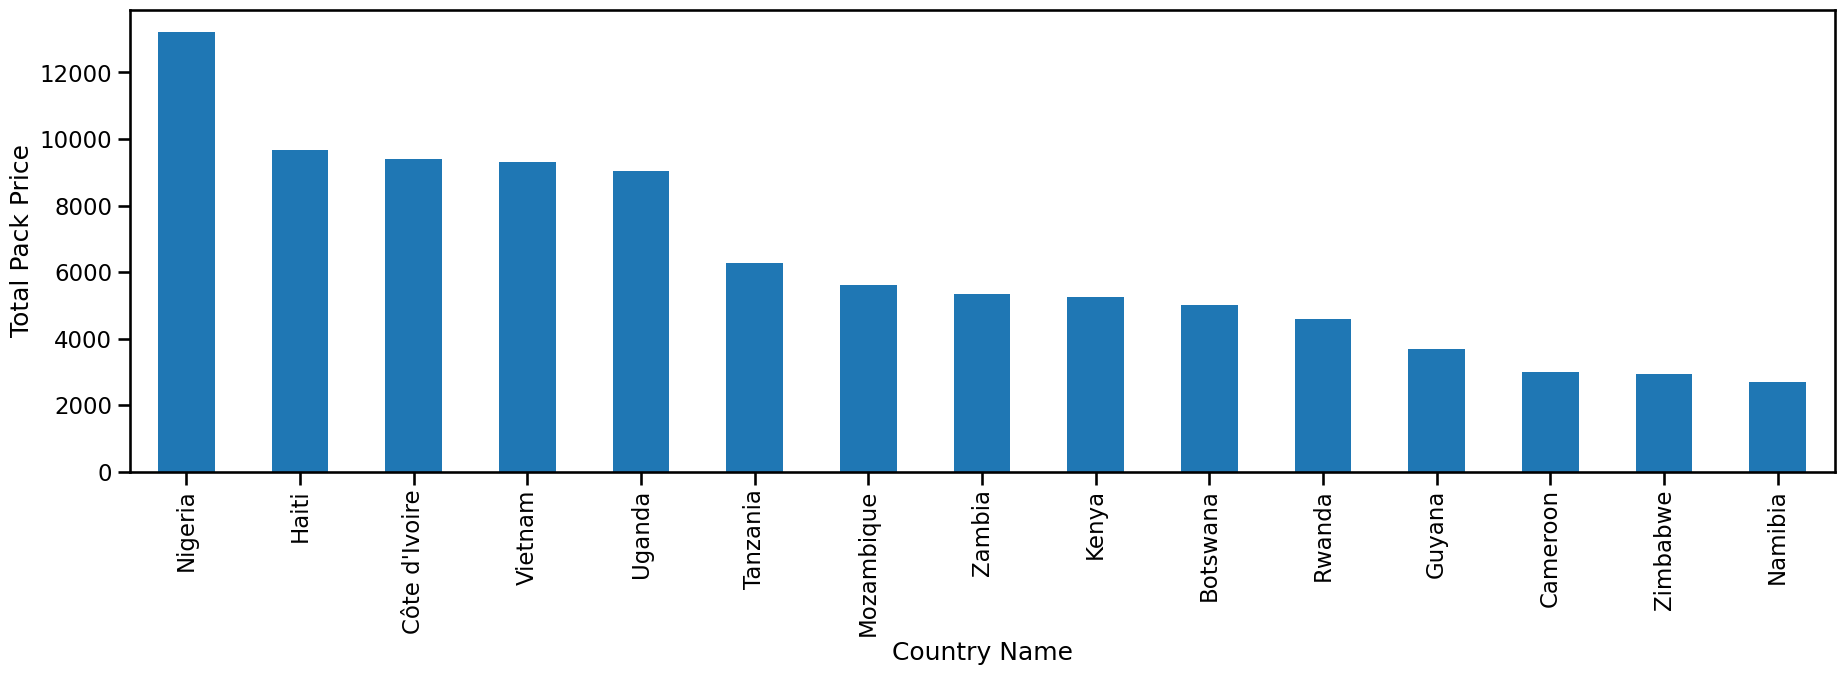

In [1123]:
#Total Pack Price for Top 15 Countries with graph
TotalPrice = x.groupby(['Country'])['Pack Price'].sum().nlargest(15)
print("Total Pack Price for Top 15 Countries\n")
print(TotalPrice)
plt.figure(figsize=(22,6))
GraphData=x.groupby(['Country'])['Pack Price'].sum().nlargest(15)
GraphData.plot(kind='bar')
plt.ylabel('Total Pack Price')
plt.xlabel('Country Name')

Text(0.5, 0, 'First Line Designation')

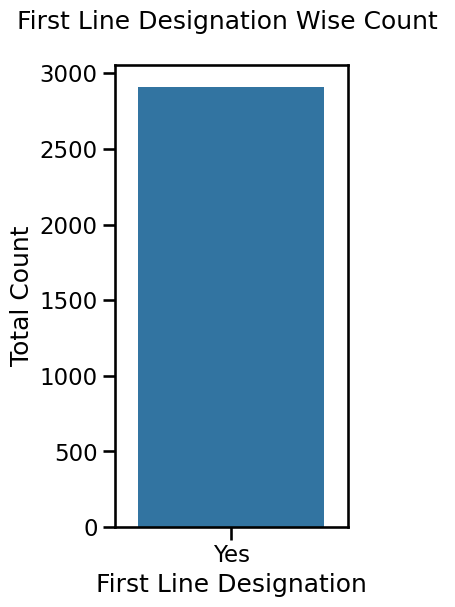

In [1124]:
# First Line Designation Count
plt.figure(figsize=(3,6))
sns.countplot(x=x['First Line Designation'])
plt.title('First Line Designation Wise Count \n')
plt.ylabel('Total Count')
plt.xlabel('First Line Designation')

In [1125]:
# Pie Chart of column Shipment Mode
ShippingMode = x["Shipment Mode"].value_counts()
labels = (np.array(ShippingMode.index))
sizes = (np.array((ShippingMode / ShippingMode.sum())*100))
trace = go.Pie(labels=labels, values=sizes)
layout = go.Layout(title="Shipment Mode")
dat = [trace]
fig = go.Figure(data=dat, layout=layout)
py.iplot(fig, filename="Shipment Mode")

Manufacturing Site
Aurobindo Unit III, India         433
Alere Medical Co., Ltd.           341
Trinity Biotech, Plc              259
Inverness Japan                   212
Mylan (formerly Matrix) Nashik    211
ABBVIE Ludwigshafen Germany       189
Hetero Unit III Hyderabad IN      154
Cipla, Goa, India                 111
ABBVIE (Abbott) Logis. UK         110
Chembio Diagnostics Sys. Inc.     110
dtype: int64


Text(0.5, 0, 'Manufacturing Site')

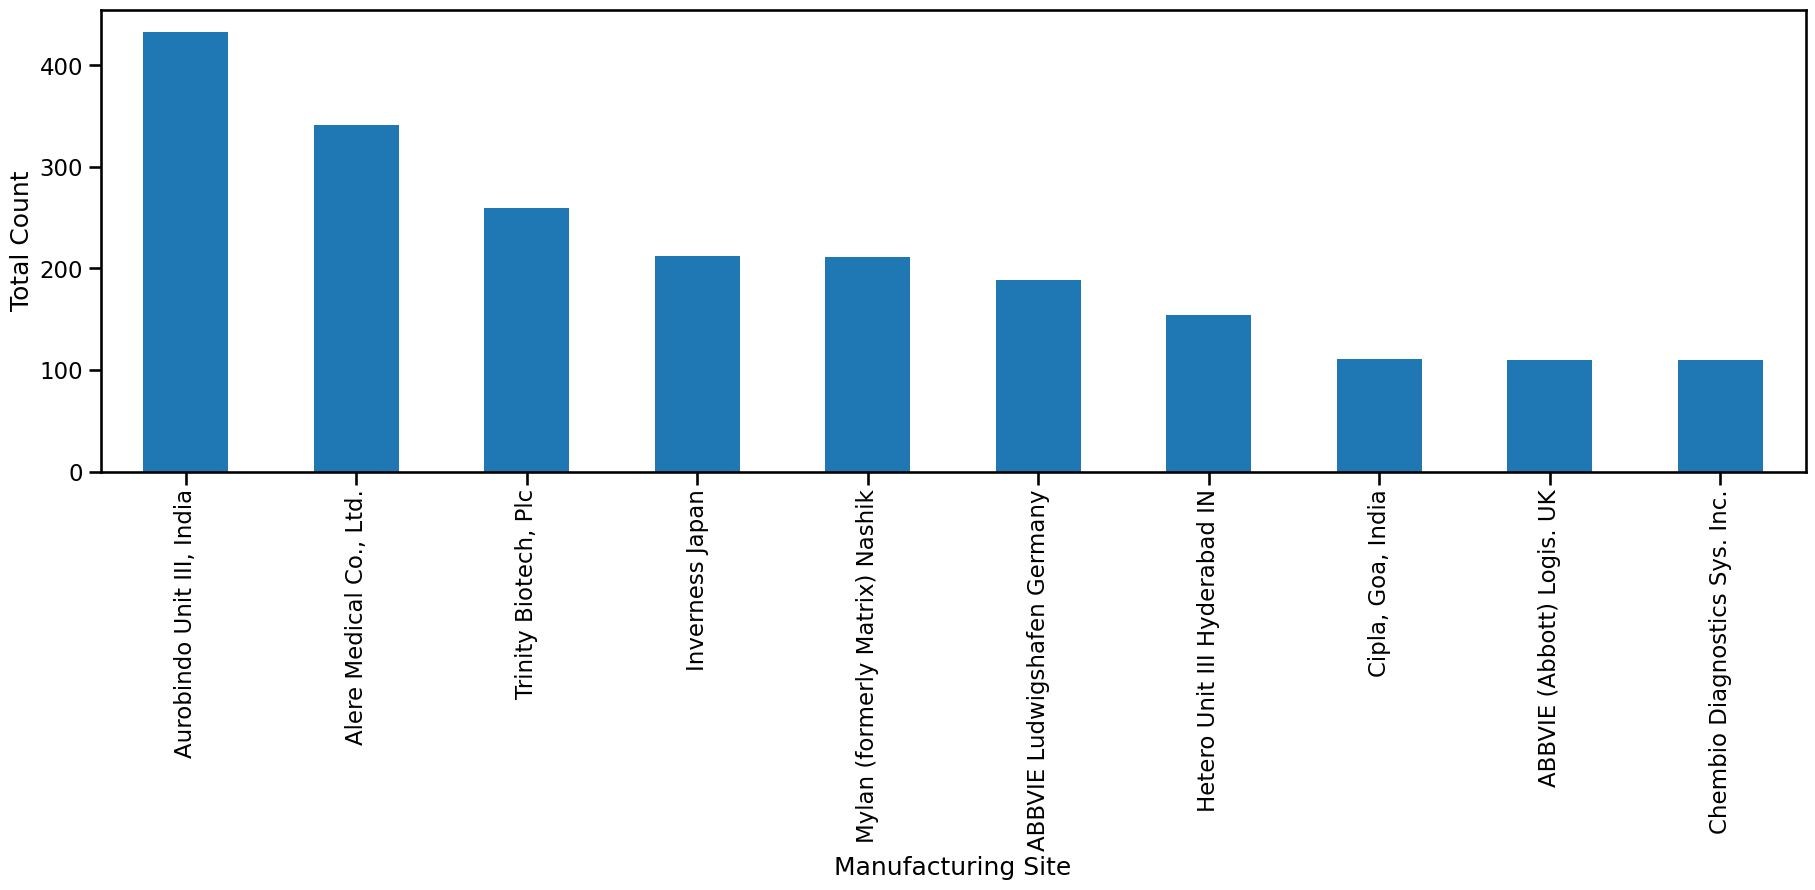

In [1126]:
# Count of Manufacturing Site name
plt.figure(figsize=(22,6))
print(TopFiveManufacturingSite)
TopFiveManufacturingSite.plot(kind='bar')
plt.ylabel('Total Count')
plt.xlabel('Manufacturing Site')

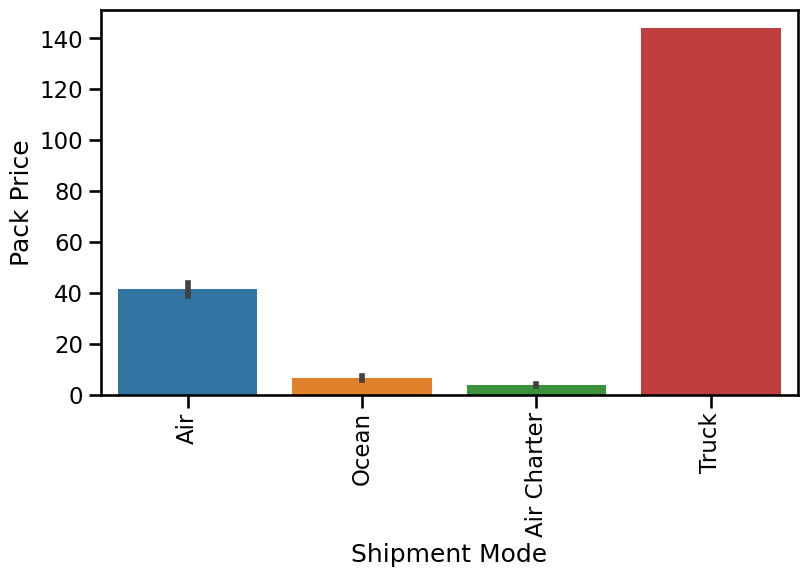

In [1127]:
#Shipment mode vs PackPrice
plt.figure(figsize = (9,5))
plt.xticks(rotation = 90)
sns.barplot(x='Shipment Mode',y='Pack Price', data = x)
plt.show()

Text(0, 0.5, 'Country')

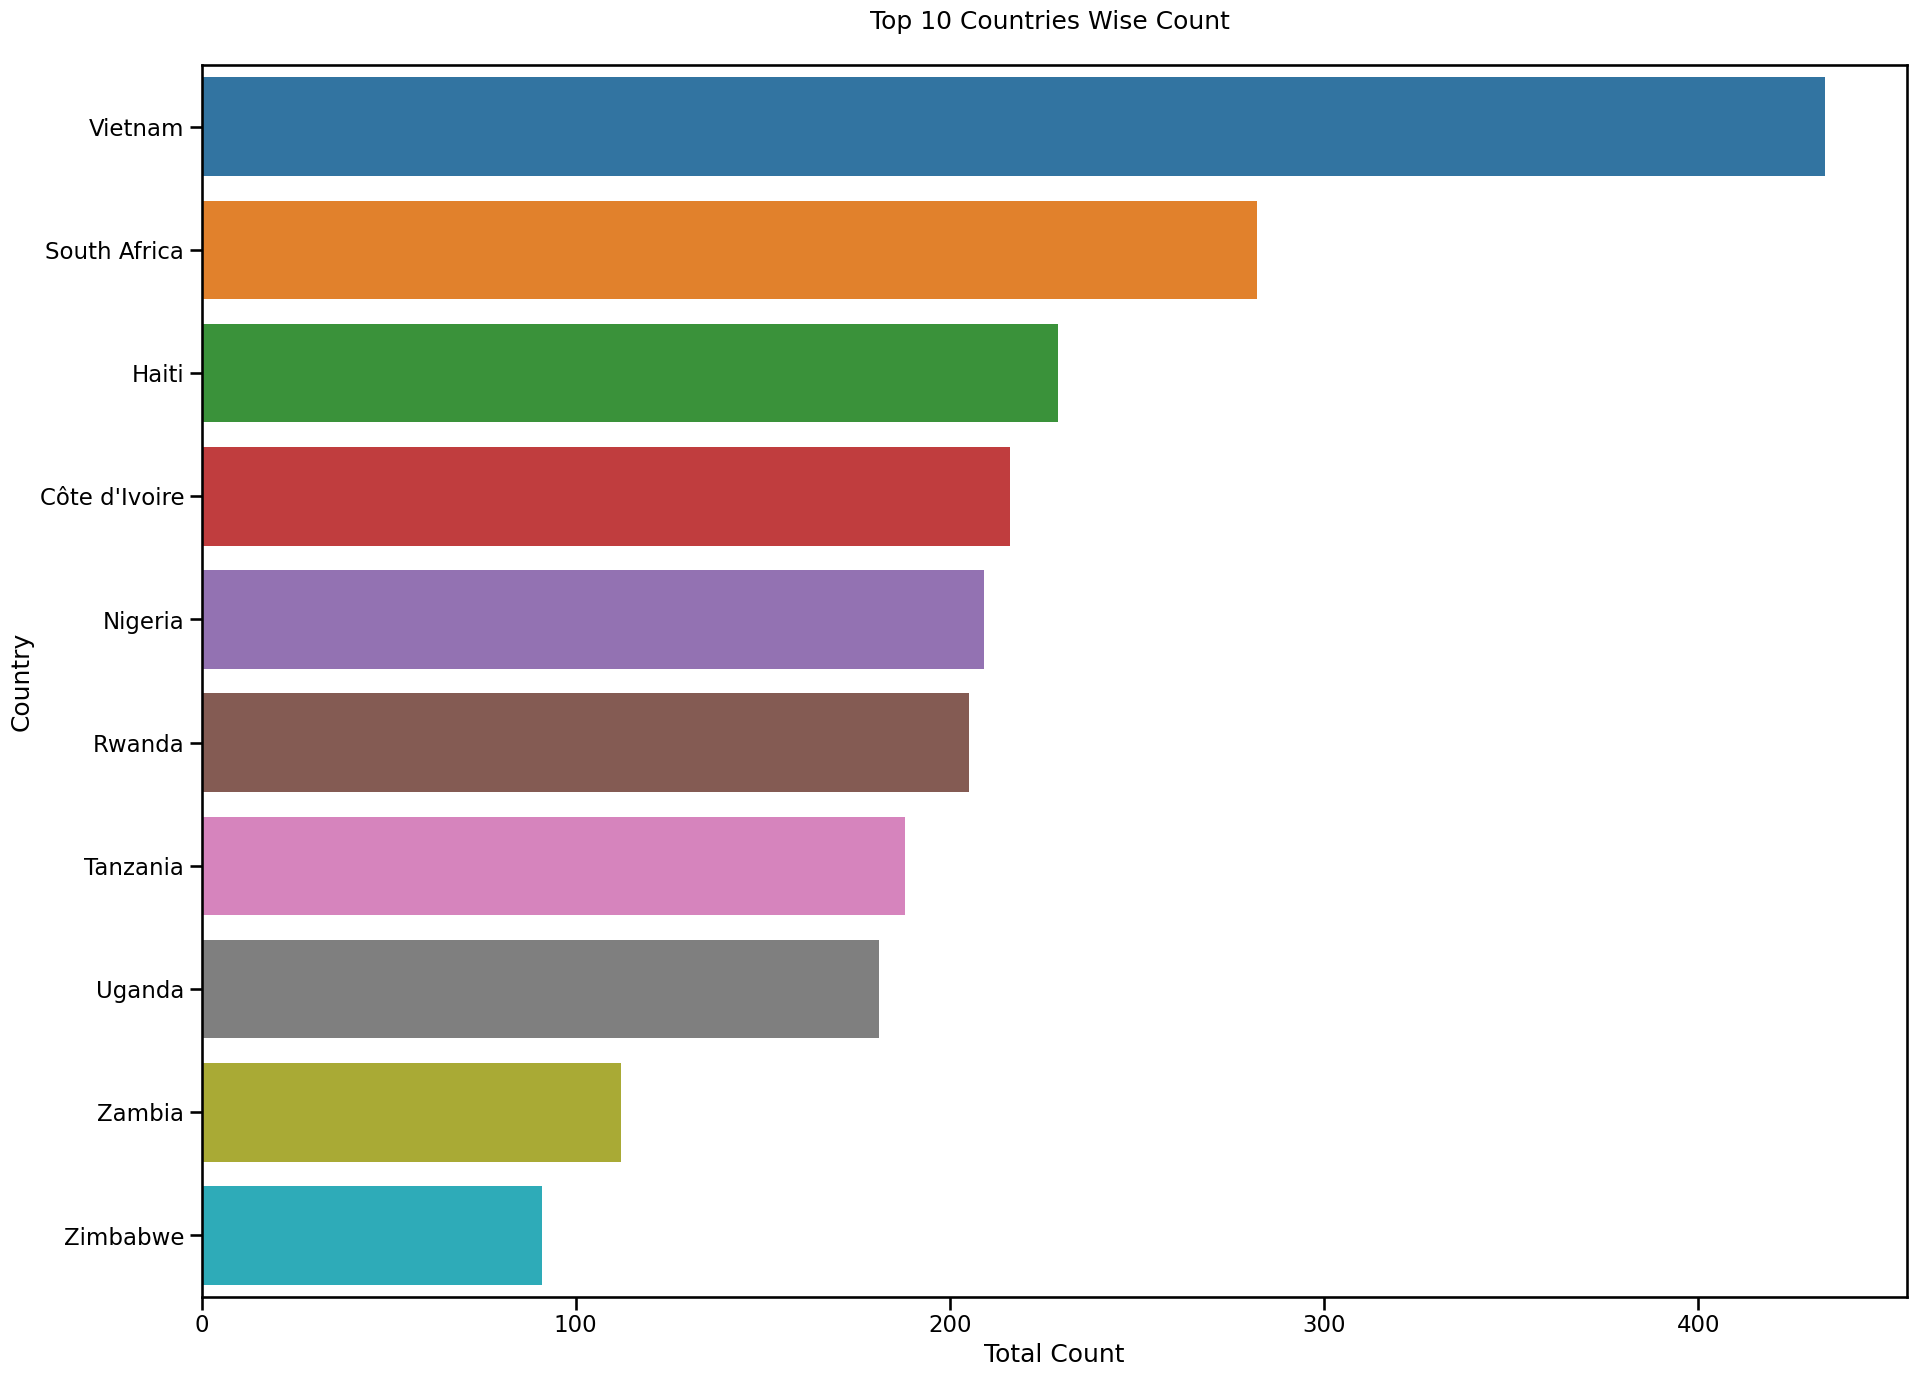

In [1128]:
# Country Wise Count
ItemCount = x["Country"].value_counts().nlargest(10)
sns.set_context("talk",font_scale=1)
plt.figure(figsize=(22,16))
sns.countplot(y=x['Country'],order = x['Country'].value_counts().nlargest(10).index)
plt.title('Top 10 Countries Wise Count \n')
plt.xlabel('Total Count')
plt.ylabel('Country')

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_66308\2885947775.py:3: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<AxesSubplot: >

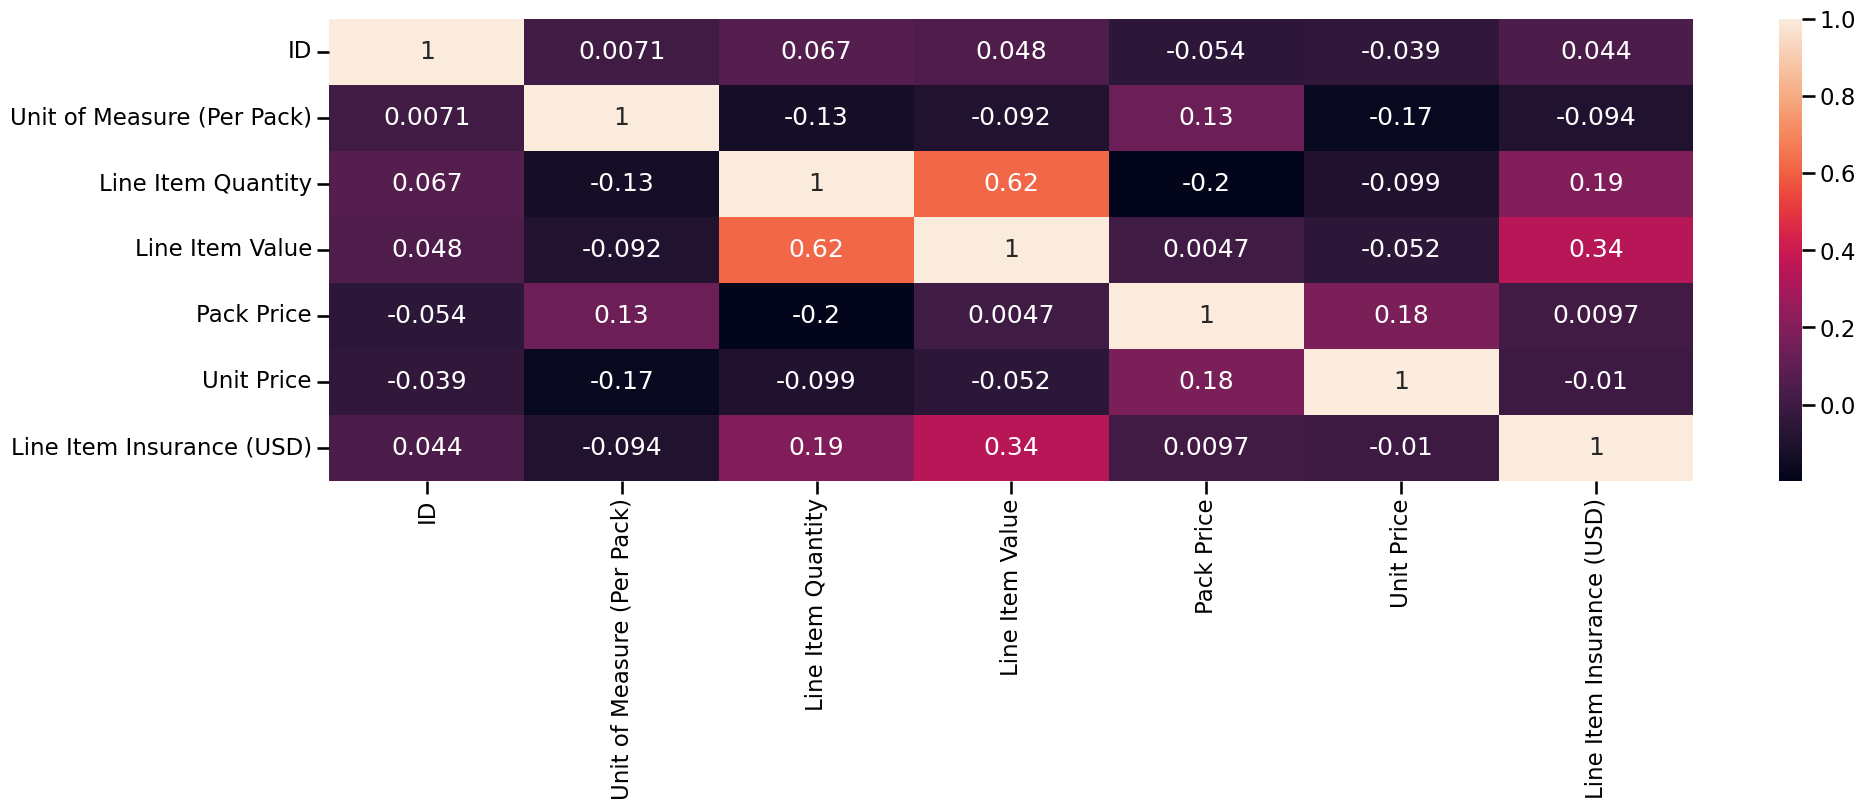

In [1129]:
#Heatmap
plt.figure(figsize=(22,6))
sns.heatmap(x.corr(),annot=True)

#### Insights
* From the heatmap we can observe that the columns present are not correlated to each other to that extent, hence they can be used while training.
* From the pie chart we can observe that most used shipment mode is air(91.6%) followed by ocean(7.75%),Followed by Air   Charter(0.615%),followed by Truck(0.0362%).
* From the count plot of 'First Line Designation' column we can observe that 'Yes' is only present. 
* From the barplot of the 'Shipment Mode' vs 'Pack Price' ,we can observe that people send their goods in large proportion     through trucks.
* from the count plot of 'total count vs country' we can observe that vietnam has exported large number of drugs.
* from the bar plot of 'Manufacturing Site' vs 'Total Count' we can observe that top two manufacturing sites are in India 

## Data Preprocessing


In [1130]:
le=LabelEncoder()
x['Shipment Mode']=le.fit_transform(x['Shipment Mode'])
# air=0

In [1131]:
x['Sub Classification']=le.fit_transform(x['Sub Classification'])

In [1801]:
x['First Line Designation']=le.fit_transform(x['First Line Designation'])

In [1845]:
x

,Project Code,Country,Shipment Mode,PO Sent to Vendor Date,Sub Classification,Item Description,Molecule/Test Type,Brand,Dosage,Dosage Form,...,Line Item Insurance (USD),Scheduled Delivery Date Year,Scheduled Delivery Date Month,Scheduled Delivery Date Day,Delivered to Client Date Year,Delivered to Client Date Month,Delivered to Client Date Day,Delivery Recorded Date Year,Delivery Recorded Date Month,Delivery Recorded Date Day
13,107-RW-T01,Rwanda,0,12/22/2006,1,"Lamivudine/Zidovudine 150/300mg, tablets, 60 Tabs",Lamivudine/Zidovudine,Generic,150/300mg,Tablet - FDC,...,47.040000,2007,2,27,2007,2,27,2007,2,27
18,109-TZ-T01,Tanzania,0,4/12/2007,5,"Didanosine 2g [Videx], powder for oral solutio...",Didanosine,Videx,2g,Powder for oral solution,...,47.040000,2007,6,6,2007,6,6,2007,6,6
19,102-NG-T01,Nigeria,0,5/13/2007,2,"HIV 1/2, Determine Complete HIV Kit, 100 Tests","HIV 1/2, Determine Complete HIV Kit",Determine,300mg,Test kit,...,128.000000,2007,6,19,2007,6,19,2007,6,19
20,102-NG-T01,Nigeria,0,5/17/2007,2,"HIV 1/2, Stat-Pak HIV, Kit, 20 Tests","HIV 1/2, Stat-Pak HIV, Kit",Stat-Pak,300mg,Test kit,...,47.040000,2007,6,19,2007,6,19,2007,6,19
22,108-VN-T01,Vietnam,0,7/4/2007,5,"Nevirapine 10mg/ml, oral suspension, Bottle, 2...",Nevirapine,Generic,10mg/ml,Oral suspension,...,3.070000,2007,10,15,2007,10,15,2007,10,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6563,161-ZA-T30,South Africa,2,6/17/2010,1,"Lamivudine 150mg, tablets, 60 Tabs",Lamivudine,Generic,150mg,Tablet,...,135.292755,2011,3,4,2011,3,4,2011,3,4
6566,161-ZA-T30,South Africa,2,6/17/2010,1,"Tenofovir Disoproxil Fumarate 300mg, tablets, ...",Tenofovir Disoproxil Fumarate,Generic,300mg,Tablet,...,174.470000,2010,12,20,2011,1,12,2011,1,12
6570,108-VN-T30,Vietnam,0,7/12/2012,1,"Nevirapine 200mg, tablets, 60 Tabs",Nevirapine,Generic,200mg,Tablet,...,28.050000,2012,10,8,2012,10,8,2012,10,8
6573,161-ZA-T30,South Africa,0,3/19/2010,1,"Efavirenz 600mg, tablets, 30 Tabs",Efavirenz,Generic,600mg,Tablet,...,135.292755,2010,9,7,2010,11,17,2010,11,17


In [1892]:
x.columns

Index(['Project Code', 'Country', 'Shipment Mode', 'PO Sent to Vendor Date',
       'Sub Classification', 'Item Description', 'Molecule/Test Type', 'Brand',
       'Dosage', 'Dosage Form', 'Unit of Measure (Per Pack)',
       'Line Item Quantity', 'Line Item Value', 'Pack Price', 'Unit Price',
       'Manufacturing Site', 'First Line Designation', 'Weight (Kilograms)',
       'Freight Cost (USD)', 'Line Item Insurance (USD)',
       'Scheduled Delivery Date Year', 'Scheduled Delivery Date Month',
       'Scheduled Delivery Date Day', 'Delivered to Client Date Year',
       'Delivered to Client Date Month', 'Delivered to Client Date Day',
       'Delivery Recorded Date Year', 'Delivery Recorded Date Month',
       'Delivery Recorded Date Day'],
      dtype='object')

In [1271]:
x['Weight (Kilograms)'] = x['Weight (Kilograms)'].astype(int)

## ML TRAINING
### Prediction of Weight (Kilograms)

In [1899]:
trainx=x[['Sub Classification','Line Item Quantity','Line Item Value']]
trainy=x['Weight (Kilograms)']

In [1900]:
X=trainx.iloc[:, ].values.astype(int)

In [1901]:
Y=trainy.iloc[:,].values.astype(int)

In [1902]:
print(X)
print(Y)

[[     1  10000  99800]
 [     5    712   8964]
 [     2   1000  80000]
 ...
 [     1   8586  20005]
 [     1  39049 182358]
 [     5     98   1233]]
[7416  162  341 ...  544 3669   22]


In [1903]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.20)

In [1904]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(2327, 3)
(582, 3)
(2327,)
(582,)


In [1905]:
mms=MinMaxScaler()
X_train_mms=mms.fit_transform(X_train)
X_test_mms=mms.fit_transform(X_test)


In [1906]:
# Linear Regression
model=LinearRegression()
model.fit(X_train,Y_train)
print(model.coef_.astype(int))
model.intercept_.astype(int)


[141   0   0]


233

In [1913]:
pred=model.predict(X_test[0,:].reshape(1,-1)).astype(int)
pred

array([2114])

In [1908]:
model.score(X_test,Y_test)

0.7583409180799514

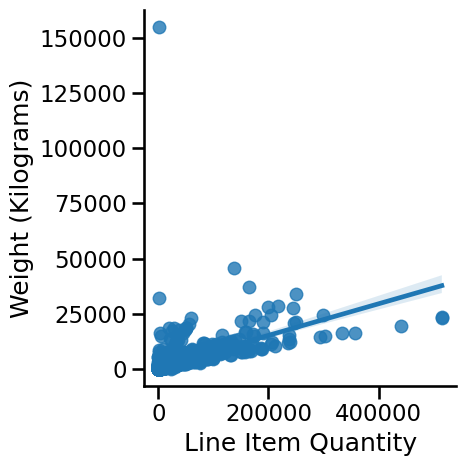

In [1909]:
sns.lmplot(x ='Line Item Quantity', y ='Weight (Kilograms)', data = x)

In [1914]:
def rmse_score(Y_test,pred):
    value=(1/len(Y_test))*np.sum((Y_test-pred)**2)
    return np.sqrt(value)

In [1915]:
rmse_scores.append(rmse_score(Y_test,pred))

NameError: name 'rmse_scores' is not defined

Project Code                   object
Country                        object
Shipment Mode                   int32
PO Sent to Vendor Date         object
Scheduled Delivery Date        object
Delivered to Client Date       object
Delivery Recorded Date         object
Sub Classification              int32
Item Description               object
Molecule/Test Type             object
Brand                          object
Dosage                         object
Dosage Form                    object
Unit of Measure (Per Pack)      int64
Line Item Quantity              int64
Line Item Value               float64
Pack Price                    float64
Unit Price                    float64
Manufacturing Site             object
First Line Designation          int32
Weight (Kilograms)              int32
Freight Cost (USD)             object
Line Item Insurance (USD)     float64
dtype: object

In [1804]:
x

,Project Code,Country,Shipment Mode,PO Sent to Vendor Date,Scheduled Delivery Date,Delivered to Client Date,Delivery Recorded Date,Sub Classification,Item Description,Molecule/Test Type,...,Unit of Measure (Per Pack),Line Item Quantity,Line Item Value,Pack Price,Unit Price,Manufacturing Site,First Line Designation,Weight (Kilograms),Freight Cost (USD),Line Item Insurance (USD)
13,107-RW-T01,Rwanda,0,12/22/2006,27-Feb-07,27-Feb-07,27-Feb-07,1,"Lamivudine/Zidovudine 150/300mg, tablets, 60 Tabs",Lamivudine/Zidovudine,...,60,10000,99800.00,9.98,0.17,"Cipla, Goa, India",0,7416,64179.42,47.040000
18,109-TZ-T01,Tanzania,0,4/12/2007,6-Jun-07,6-Jun-07,6-Jun-07,5,"Didanosine 2g [Videx], powder for oral solutio...",Didanosine,...,200,712,8964.08,12.59,0.06,"BMS Meymac, France",0,162,912.96,47.040000
19,102-NG-T01,Nigeria,0,5/13/2007,19-Jun-07,19-Jun-07,19-Jun-07,2,"HIV 1/2, Determine Complete HIV Kit, 100 Tests","HIV 1/2, Determine Complete HIV Kit",...,100,1000,80000.00,80.00,0.80,ABBVIE GmbH & Co.KG Wiesbaden,0,341,2682.47,128.000000
20,102-NG-T01,Nigeria,0,5/17/2007,19-Jun-07,19-Jun-07,19-Jun-07,2,"HIV 1/2, Stat-Pak HIV, Kit, 20 Tests","HIV 1/2, Stat-Pak HIV, Kit",...,20,7500,202500.00,27.00,1.35,Chembio Diagnostics Sys. Inc.,0,2278,15893.71,47.040000
22,108-VN-T01,Vietnam,0,7/4/2007,15-Oct-07,15-Oct-07,15-Oct-07,5,"Nevirapine 10mg/ml, oral suspension, Bottle, 2...",Nevirapine,...,240,1000,1920.00,1.92,0.01,"Aurobindo Unit III, India",0,941,4193.49,3.070000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6563,161-ZA-T30,South Africa,2,6/17/2010,4-Mar-11,4-Mar-11,4-Mar-11,1,"Lamivudine 150mg, tablets, 60 Tabs",Lamivudine,...,60,130828,316603.76,2.42,0.04,"Aurobindo Unit III, India",0,6525,10984.82,135.292755
6566,161-ZA-T30,South Africa,2,6/17/2010,20-Dec-10,12-Jan-11,12-Jan-11,1,"Tenofovir Disoproxil Fumarate 300mg, tablets, ...",Tenofovir Disoproxil Fumarate,...,30,11711,80923.01,6.91,0.23,"Aurobindo Unit III, India",0,1093,5460.48,174.470000
6570,108-VN-T30,Vietnam,0,7/12/2012,8-Oct-12,8-Oct-12,8-Oct-12,1,"Nevirapine 200mg, tablets, 60 Tabs",Nevirapine,...,60,8586,20005.38,2.33,0.04,Hetero Unit III Hyderabad IN,0,544,1454.64,28.050000
6573,161-ZA-T30,South Africa,0,3/19/2010,7-Sep-10,17-Nov-10,17-Nov-10,1,"Efavirenz 600mg, tablets, 30 Tabs",Efavirenz,...,30,39049,182358.83,4.67,0.16,"Aurobindo Unit III, India",0,3669,4263.07,135.292755


### DECISION TREE

In [1846]:
xtrain=x[['Sub Classification','Unit of Measure (Per Pack)','Scheduled Delivery Date Year','Scheduled Delivery Date Month','Scheduled Delivery Date Day','Delivered to Client Date Year','Delivered to Client Date Month','Delivered to Client Date Day','Delivery Recorded Date Year','Delivery Recorded Date Month','Delivery Recorded Date Day','Line Item Quantity','Line Item Value','Pack Price','First Line Designation','Weight (Kilograms)','Freight Cost (USD)']]
ytrain=x['Shipment Mode']

In [1847]:
x_train=xtrain.iloc[:, ]
y_train=ytrain.iloc[:,]

In [1848]:
xtrain,xtest,ytrain,ytest=train_test_split(x_train,y_train,test_size=0.2)


In [1849]:
model=DecisionTreeClassifier()
model.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [1850]:
print('Testing Accuracy:',model.score(xtest,ytest))

Testing Accuracy: 0.9415807560137457


In [1851]:
predictions=model.predict(xtest)

In [1852]:
matrix=confusion_matrix(ytest,predictions)
matrix

array([[511,   3,  18],
       [  0,   0,   0],
       [ 12,   1,  37]], dtype=int64)

In [1853]:
value_counts=dict(x['Shipment Mode'].value_counts())
print(value_counts)

{0: 2614, 2: 277, 1: 17, 3: 1}


In [1854]:
for key,value in value_counts.items():
    value_counts[key]=value/len(x)
    
print(value_counts)

{0: 0.8985905809556549, 2: 0.09522172567892746, 1: 0.005843932622894466, 3: 0.00034376074252320387}


In [1855]:
class_weights={}
for key,value in value_counts.items():
    class_weights[key]=sum(value_counts.values())-value/sum(value_counts.values())
    
class_weights


{0: 0.10140941904434553,
 2: 0.9047782743210728,
 1: 0.9941560673771057,
 3: 0.999656239257477}

In [1856]:
model_tree=DecisionTreeClassifier(max_depth=8,class_weight=class_weights)
model_tree.fit(xtrain,ytrain)

DecisionTreeClassifier(class_weight={0: 0.10140941904434553,
                                     1: 0.9941560673771057,
                                     2: 0.9047782743210728,
                                     3: 0.999656239257477},
                       max_depth=8)

In [1857]:
print("Testing Accuracy:",model.score(xtest,ytest))

Testing Accuracy: 0.9415807560137457


In [1858]:
predictions=model.predict(xtest)

In [1859]:
matrix=confusion_matrix(ytest,predictions)
matrix

array([[511,   3,  18],
       [  0,   0,   0],
       [ 12,   1,  37]], dtype=int64)

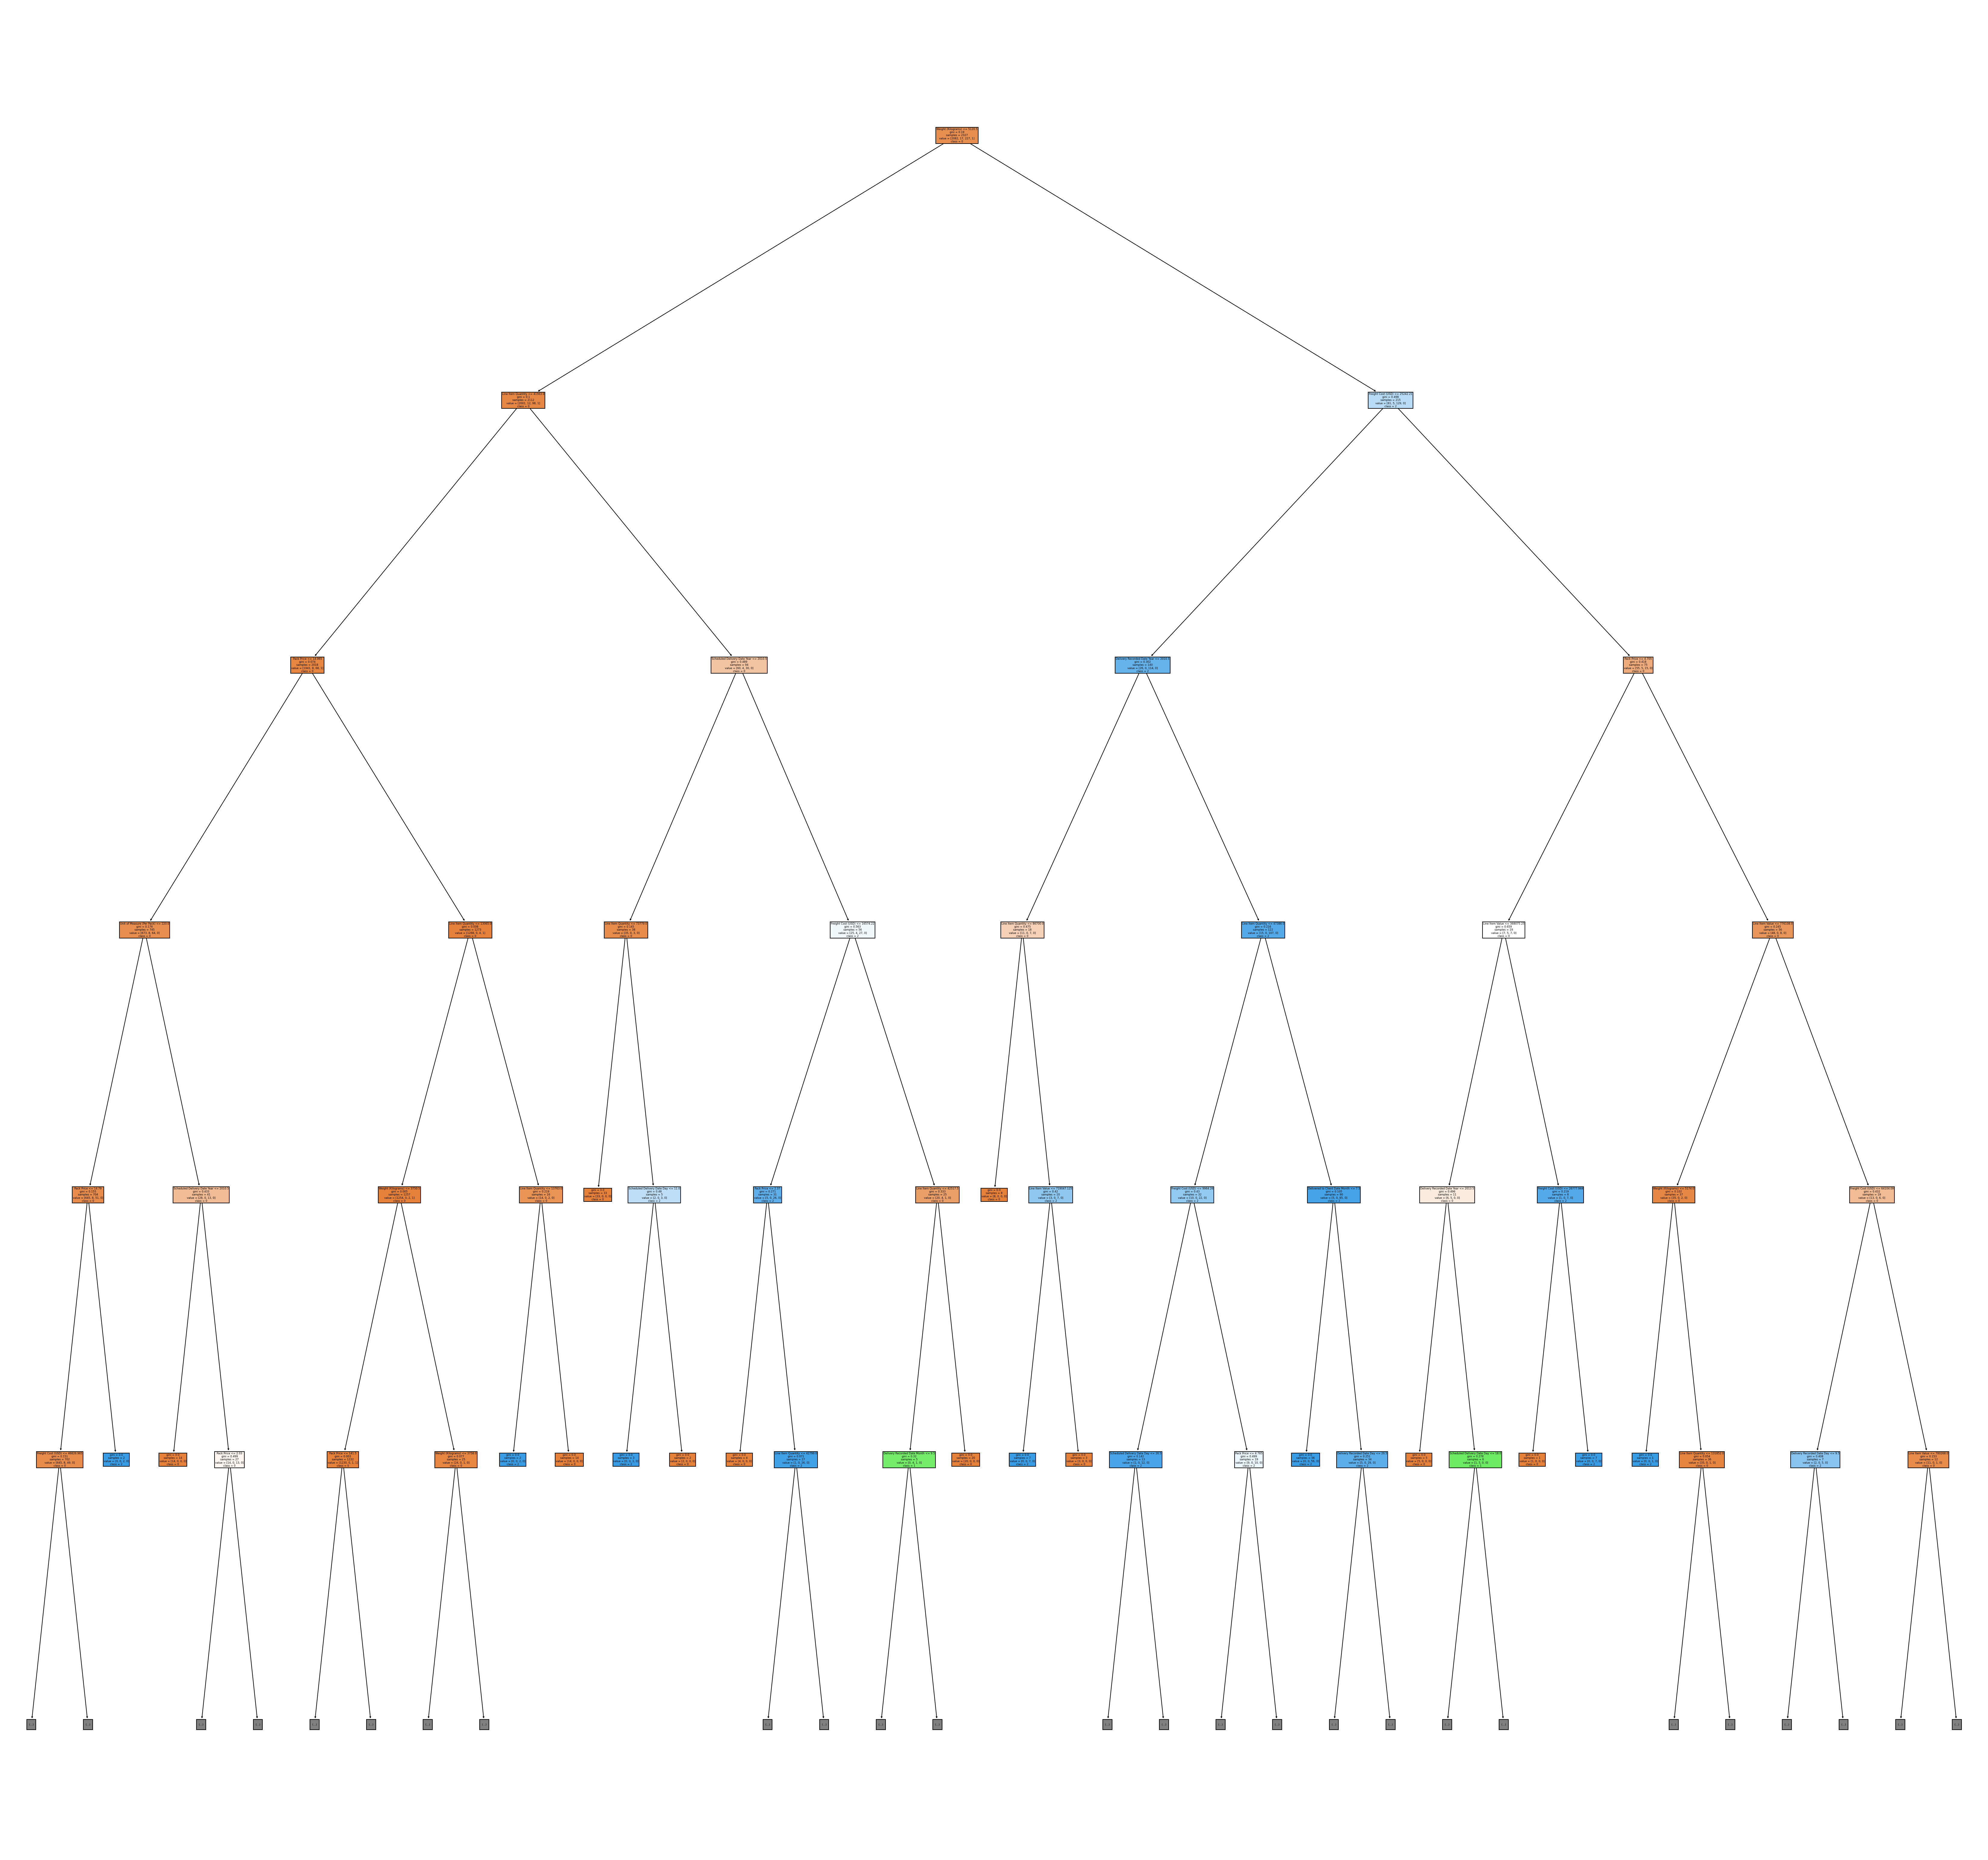

In [1860]:
# Visualizing tree
fig=plt.figure(figsize=(85,80))
_=tree.plot_tree(model,max_depth=5,feature_names=x_train.columns,class_names=['0','1','2','3'],filled=True)